### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# do not know what this is for
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

### Import Data

In [3]:
# custom datasets
cs_df = pd.read_csv('computer_sales.txt', delimiter = ',')
cs_df.head()

# seaborn built-in datasets
# print(sns.get_dataset_names()) # seaborn build-in datasets
car_crashes_ds = sns.load_dataset('car_crashes')
print(type(car_crashes_ds))
car_crashes_ds.tail()

<class 'pandas.core.frame.DataFrame'>


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
46,12.7,2.413,3.429,11.049,11.176,768.95,153.72,VA
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


### Distribution Plots

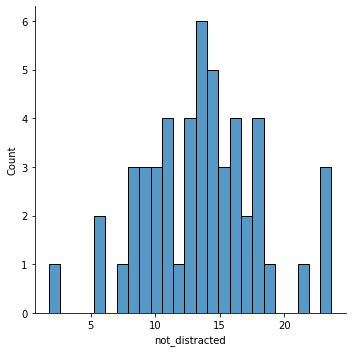

In [13]:
# Distribution plot
sns.displot(car_crashes_ds['not_distracted'], kde = False, bins = 25) # shift + tab to check the properties of this function

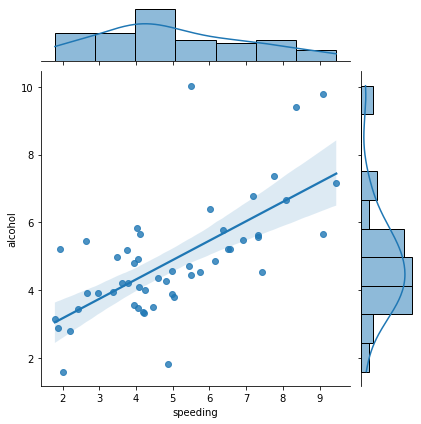

In [6]:
# joint plot - used to compare 2 distributions; plots a scatter plot by default
sns.jointplot(x = 'speeding', y = 'alcohol', data = car_crashes_ds, kind = 'reg') # plots a regression line
# can plot different 'kinds' - kde; hex etc.,

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

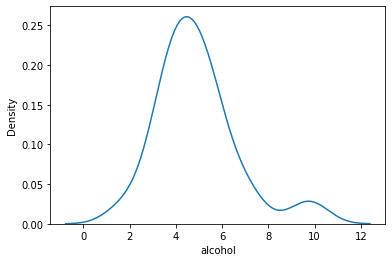

In [17]:
# KDE plot
sns.kdeplot(car_crashes_ds['alcohol'])

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


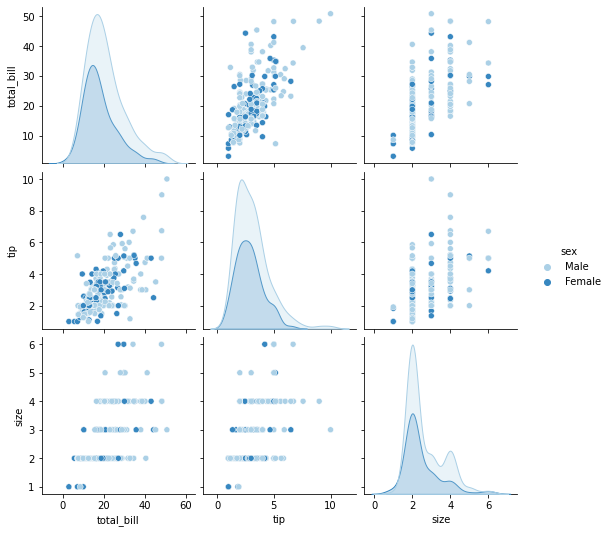

In [22]:
# pair plot - relationships accross the entire dataframe of numerical values as pairs

# sns.pairplot(car_crashes_ds, kind = 'reg')

tips_df = sns.load_dataset('tips')
print(tips_df.columns)
sns.pairplot(tips_df, hue = 'sex', palette = 'Blues') # 'hue' to separate categorical data

<AxesSubplot:xlabel='tip'>

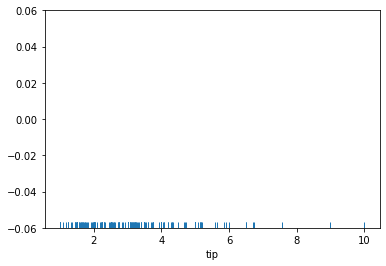

In [23]:
# rug plot - gives a denser plot where the values are common
sns.rugplot(tips_df['tip'])

### Styling the plots

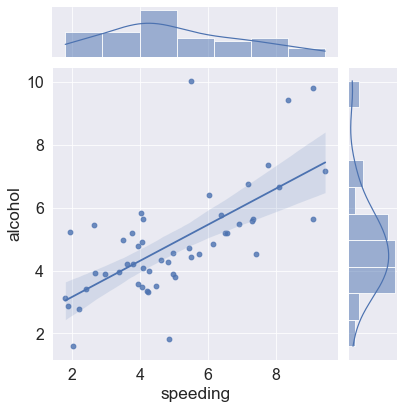

In [49]:
sns.set_style('darkgrid') # set the style for your plot. others: ticks, white, dark
# plt.figure(figsize = (2, 2)) # not working
sns.set_context('paper', font_scale = 1.8) # talk is a style used for presentation. others: poster for printing on paper, paper for jupyter notebook 
sns.jointplot(x = 'speeding', y = 'alcohol', data = car_crashes_ds, kind = 'reg')
# sns.despine(left = True, bottom = True) # removes the axes lines

### Categorical Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

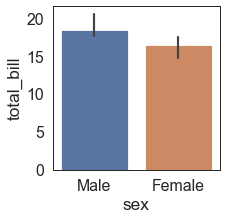

In [50]:
# bar plot - use it for categorical data
sns.set_style('white')
sns.barplot(x = 'sex', y = 'total_bill', data = tips_df, estimator = np.median) # estimator can be mean, median, mode, sd, var, cov etc.,

<AxesSubplot:xlabel='sex', ylabel='count'>

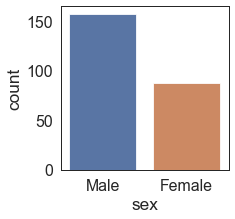

In [51]:
# count plot - estimator for count plot just counts the number of occurences
sns.countplot(x = 'sex', data = tips_df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

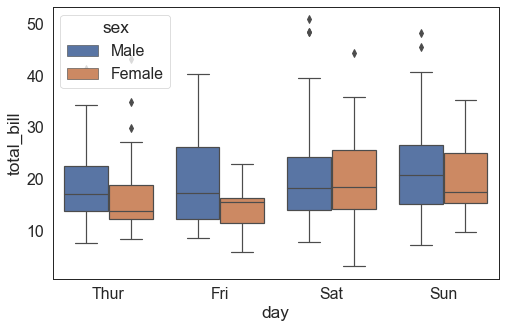

In [55]:
# box plot - compare different variables & show quartiles of the data
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips_df) # use 'hue' to plot and observe another variable

<AxesSubplot:xlabel='day', ylabel='total_bill'>

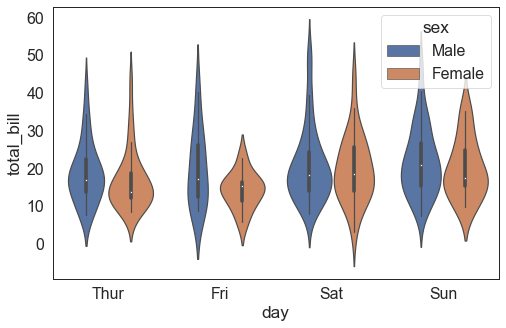

In [58]:
# violin plot - combination of a boxplot & kde plot
# box plot uses the data points and shows the mean, median etc while the violin plot uses kde for the points
plt.figure(figsize = (8, 5))
sns.violinplot(x = 'day', y = 'total_bill', data = tips_df, hue = 'sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

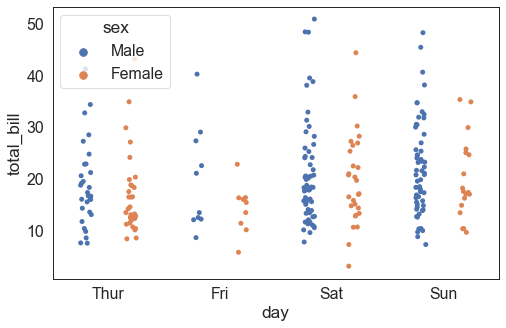

In [62]:
# strip plot - scatter plot for all data points where 1 variable is categorical
plt.figure(figsize = (8, 5))
sns.stripplot(x = 'day', y = 'total_bill', data = tips_df, jitter = True, hue = 'sex', dodge = True) # jitter to spread the data; dodge to separate the hue

In [ ]:
# swarm plot - missing

### Styling

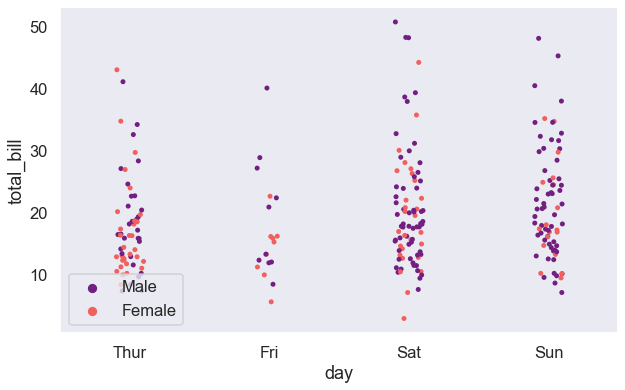

In [69]:
plt.figure(figsize = (10, 6)) # set the figure size
sns.set_style('dark') # set the figure style
sns.set_context('talk') # design for the figure
sns.stripplot(x = 'day', y = 'total_bill', data = tips_df, hue = 'sex', palette = 'magma') # palette is the colormaps. colormaps are the spectrum of colors for your map
# other legend locations
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc = 3)

### Matrix Plots

<AxesSubplot:>

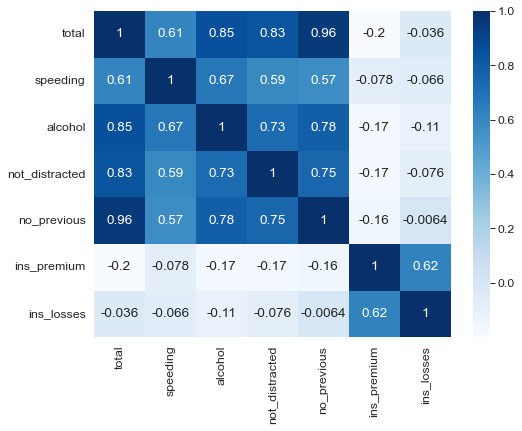

In [76]:
# heatmaps
# Covariance indicates the direction of the linear relationship between variables 
# while correlation measures both the strength and direction of the linear relationship 
# between two variables.
plt.figure(figsize = (8, 6))
sns.set_context('paper', font_scale = 1.4)
# heatmaps need a matrix
crash_mx = car_crashes_ds.corr()
sns.heatmap(crash_mx, annot = True, cmap = 'Blues')

<AxesSubplot:xlabel='year', ylabel='month'>

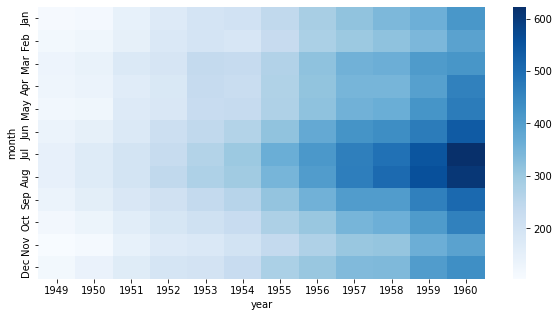

In [8]:
# another example for heatmaps
plt.figure(figsize = (10, 5))
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
sns.heatmap(flights, cmap = 'Blues') # can further use attributes like linecolor; linewidth

### Cluster Map

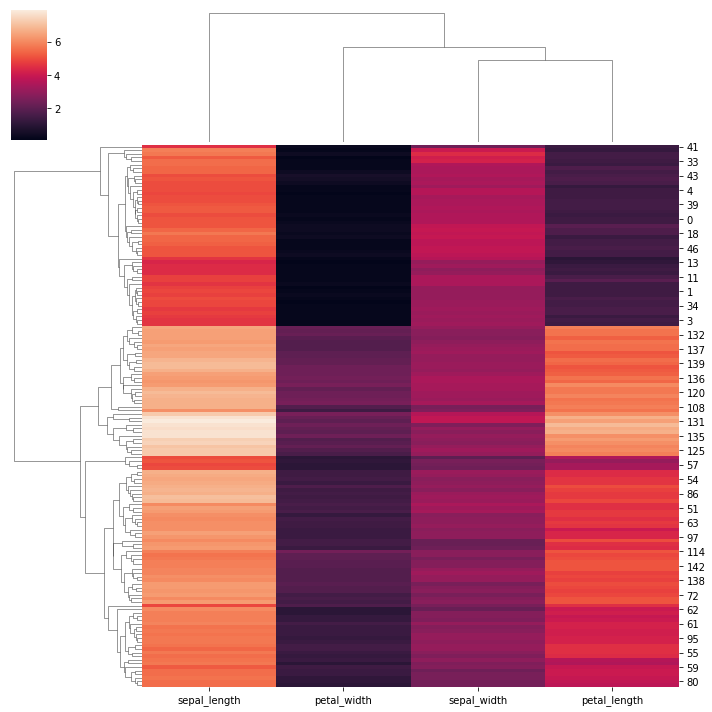

In [10]:
iris = sns.load_dataset('iris')
classLabel = iris.pop('species') 
sns.clustermap(iris)

### Pair grids

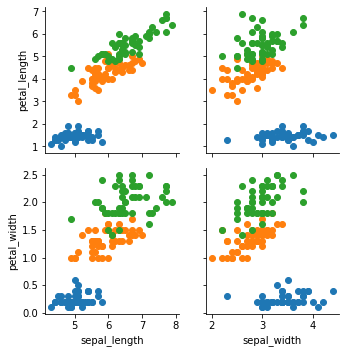

In [23]:
iris = sns.load_dataset('iris')
# iris_g = sns.PairGrid(iris, hue = 'species')
# #iris_g.map(plt.scatter) # make every plot a scatter plot in the gird
# iris_g.map_diag(plt.hist) # make a histogram plot on the diagonal of the grid
# #iris_g.map_offdiag(plt.scatter) # make all plots above and below the diagonal 
# iris_g.map_upper(plt.scatter) # plot a scatter plot on the plots above the diagonal
# iris_g.map_lower(sns.kdeplot) # plot kde plots on the plots below the diagonal
iris_g = sns.PairGrid(iris, hue = 'species', x_vars = ['sepal_length', 'sepal_width'], y_vars = ['petal_length', 'petal_width']) # set custom variables for the pair plots
iris_g.map(plt.scatter)

### Facet Grid

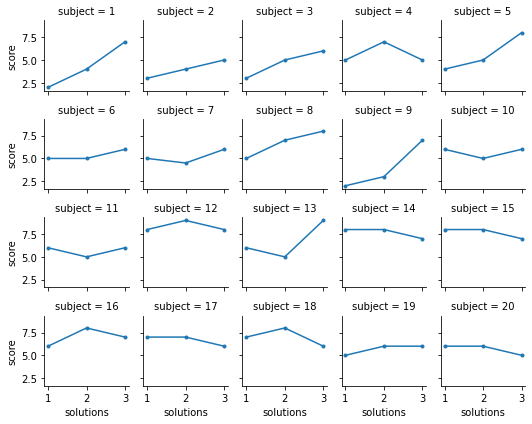

In [39]:
# Pair grid for camparing the relationship between 2 features.Each subplot in PairFrid shows a relationship between different pair of variables
# Fcet grid for comparing the relationsip with categorical values for a variable vs other features. FacetGrid shows relationship between same pair of variables in different circumstances

# # Facet grid plot 1
# tips_df = sns.load_dataset('tips')
# tips_fg = sns.FacetGrid(tips_df, col = 'time', hue = 'smoker', height = 4, aspect = 1.3, col_order = ['Dinner', 'Lunch'],
#                        palette = 'Set1')
# tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor = 'w') 


# # Facet grid plot 2
# kwargs = dict(s = 50, linewidth = 0.9, edgecolor = 'w')
# tips_fg = sns.FacetGrid(tips_df, col = 'sex', hue = 'smoker', height = 4, aspect = 1.3, hue_order = ['Yes', 'No'],
#                        hue_kws = dict(marker = ['^', 'v']))
# tips_fg.map(plt.scatter, 'total_bill', 'tip', **kwargs)

# Facet grid plot 3
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col = 'subject', col_wrap = 5, height = 1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker = '.')

### Regression Plots

<Figure size 576x432 with 0 Axes>

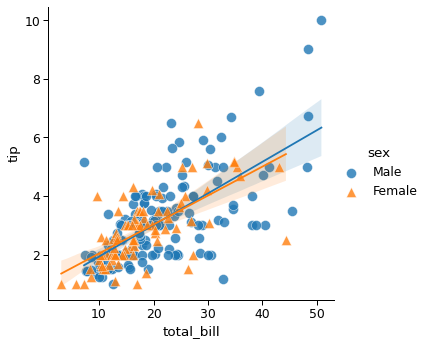

In [44]:
tips_df.head()
plt.figure(figsize = (8, 6))
sns.set_context('paper', font_scale = 1.4)
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips_df, markers = ['o', '^'], scatter_kws = {'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

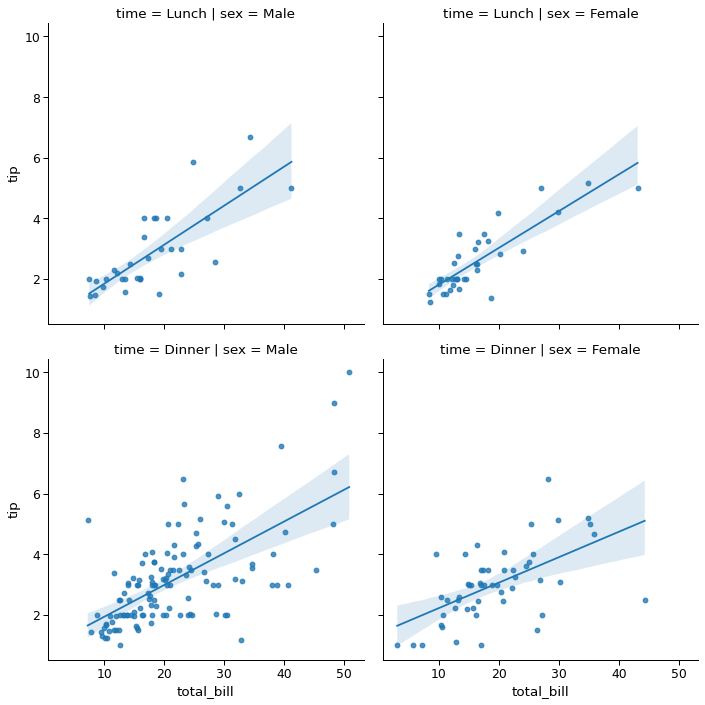

In [45]:
# regression plot 2
sns.lmplot(x = 'total_bill', y = 'tip', col = 'sex', row = 'time', data = tips_df)

### Room for more